# Project Milestone 3 - Neural Networks

In [51]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

random_seed = 1
np.random.seed(random_seed)
torch.manual_seed(random_seed)

# Dataset Import

In [3]:
# Glove
glove_df_train = pd.read_csv("../../project_data/data/glove/glove.train.csv")
glove_df_test = pd.read_csv("../../project_data/data/glove/glove.test.csv")
glove_df_eval = pd.read_csv("../../project_data/data/glove/glove.eval.anon.csv")

# Bag of words
bow_df_train = pd.read_csv("../../project_data/data/bag-of-words/bow.train.csv")
bow_df_test = pd.read_csv("../../project_data/data/bag-of-words/bow.test.csv")
bow_df_eval = pd.read_csv("../../project_data/data/bag-of-words/bow.eval.anon.csv")

# TFIDF
tfidf_df_train = pd.read_csv("../../project_data/data/tfidf/tfidf.train.csv")
tfidf_df_test = pd.read_csv("../../project_data/data/tfidf/tfidf.test.csv")
tfidf_df_eval = pd.read_csv("../../project_data/data/tfidf/tfidf.eval.anon.csv")

print("Glove Dataset")
glove_df_train

print("BOW Dataset")
bow_df_train

print("TFIDF Dataset")
tfidf_df_train

Glove Dataset
BOW Dataset
TFIDF Dataset


,label,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x9990,x9991,x9992,x9993,x9994,x9995,x9996,x9997,x9998,x9999
0,1,0.177057,0.063437,0.083603,0.407604,0.119183,0.096883,0.047931,0.117364,0.046370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020774,0.000000,0.020098,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.109398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.000000,0.000000,0.044455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17495,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17496,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17497,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17498,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [186]:
class Model(nn.Module):
    def __init__(
        self,
        num_of_features=10000,
        # hidden_layer_1_size=7500,
        hidden_layer_2_size=5000,
        # hidden_layer_3_size=2500,
        hidden_layer_4_size=500,
        num_of_outputs=2,
    ):
        super().__init__()
        # self.forward_connection_1 = nn.Linear(num_of_features, hidden_layer_1_size)
        # self.forward_connection_2 = nn.Linear(hidden_layer_1_size, hidden_layer_2_size)
        # self.forward_connection_3 = nn.Linear(hidden_layer_2_size, hidden_layer_3_size)
        # self.forward_connection_4 = nn.Linear(hidden_layer_3_size, hidden_layer_4_size)
        self.forward_connection_1 = nn.Linear(num_of_features, hidden_layer_2_size)
        self.dropout = nn.Dropout(p=0.25)
        self.forward_connection_3 = nn.Linear(hidden_layer_2_size, hidden_layer_4_size)
        self.dropout = nn.Dropout(p=0.25)
        self.output_connection = nn.Linear(hidden_layer_4_size, num_of_outputs)

    def forward(self, example):
        example = F.tanh(self.forward_connection_1(example))
        # example = F.relu(self.forward_connection_2(example))
        example = F.tanh(self.forward_connection_3(example))
        # example = F.relu(self.forward_connection_4(example))
        example = F.tanh(self.output_connection(example))

        return example


nn_relu_bow_model = Model()
nn_relu_tfidf_model = Model()
nn_relu_glove_model = Model(
    num_of_features=300,
    # hidden_layer_1_size=200,
    hidden_layer_2_size=200,
    # hidden_layer_3_size=50,
    hidden_layer_4_size=50,
    num_of_outputs=2,
)

In [32]:
def plot_loss(loss, epochs, label):
    if not loss or type(loss) is not list:
        print(f"Can't plot loss curve. Invalid loss: {loss}")
        return

    fig = plt.figure()

    # Plot the data
    plt.plot(epochs, loss, label="Loss Epoch Curve")

    # plt.xticks(epochs)
    # plt.yticks([50, 60, 70, 80, 90])

    # Label the x-axis & y-axis
    plt.xlabel("Epochs")
    plt.ylabel("Loss Values")

    plt.legend()

    # Add title to graph
    plt.title(f"{label}")

    # Save the figure
    fig.savefig("figs/{0}.png".format(label))



NN on Dataset Glove
  Epoch 10  Loss 0.6697897911071777
  Epoch 20  Loss 0.6547130346298218
  Epoch 30  Loss 0.641475260257721
  Epoch 40  Loss 0.6294039487838745
  Epoch 50  Loss 0.6182059049606323
  Epoch 60  Loss 0.6076284646987915
  Epoch 70  Loss 0.5977135896682739
  Epoch 80  Loss 0.5882777571678162
  Epoch 90  Loss 0.5791840553283691
  Epoch 100  Loss 0.5702342987060547
  Epoch 110  Loss 0.5613484978675842
  Epoch 120  Loss 0.5524449348449707
  Epoch 130  Loss 0.5436106324195862
  Epoch 140  Loss 0.5354931950569153
  Epoch 150  Loss 0.5273266434669495
  Epoch 160  Loss 0.5189746022224426
  Epoch 170  Loss 0.5104275941848755
  Epoch 180  Loss 0.5019893646240234
  Epoch 190  Loss 0.4934263527393341
  Epoch 200  Loss 0.4849076569080353
  Epoch 210  Loss 0.4762338101863861
  Epoch 220  Loss 0.46776145696640015
  Epoch 230  Loss 0.45904406905174255
  Epoch 240  Loss 0.45071637630462646
  Epoch 250  Loss 0.4419417083263397
  Epoch 260  Loss 0.43351784348487854
  Epoch 270  Loss 0.425

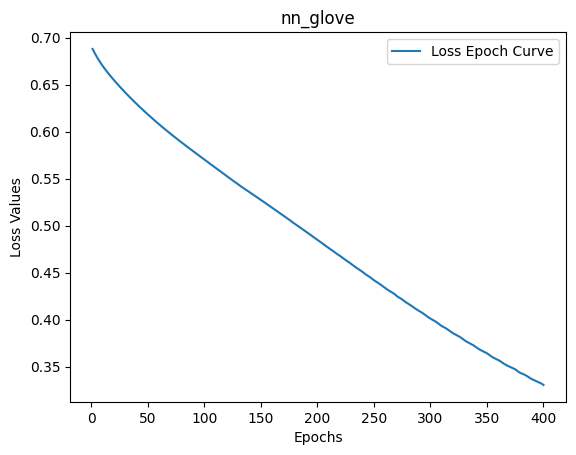

In [187]:
epochs = 400

glove_dataset_setup_dict = {
    "Glove": {"Train": glove_df_train, "Test": glove_df_test, "Eval": glove_df_eval},
    # "BOW": {"Train": bow_df_train, "Test": bow_df_test, "Eval": bow_df_eval},
    # "TFIDF": {"Train": tfidf_df_train, "Test": tfidf_df_test, "Eval": tfidf_df_eval},
}

bow_dataset_setup_dict = {
    # "Glove": {"Train": glove_df_train, "Test": glove_df_test, "Eval": glove_df_eval},
    "BOW": {"Train": bow_df_train, "Test": bow_df_test, "Eval": bow_df_eval},
    # "TFIDF": {"Train": tfidf_df_train, "Test": tfidf_df_test, "Eval": tfidf_df_eval},
}

tfidf_dataset_setup_dict = {
    # "Glove": {"Train": glove_df_train, "Test": glove_df_test, "Eval": glove_df_eval},
    # "BOW": {"Train": bow_df_train, "Test": bow_df_test, "Eval": bow_df_eval},
    "TFIDF": {"Train": tfidf_df_train, "Test": tfidf_df_test, "Eval": tfidf_df_eval},
}

optimizers = [adam_optimizer]
loss_functions = [cross_entropy_loss_func]
models = [nn_relu_model, nn_relu_glove_model]


def train_setup(dataset_setup_dict, model):
    for name, dataset in dataset_setup_dict.items():
        print(f"\nNN on Dataset {name}")
        X_Train = dataset["Train"].drop("label", axis=1)
        Y_Train = dataset["Train"]["label"]

        X_Train = X_Train.values
        Y_Train = Y_Train.values

        X_Train = torch.FloatTensor(X_Train)
        Y_Train = torch.LongTensor(Y_Train)

        # Function to be used to measure error or how far the model is from prediction.
        cross_entropy_loss_func = nn.CrossEntropyLoss()

        # Control learning rate throughout the epochs for optimizing learning
        adam_optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

        losses = []
        for epoch in range(1, epochs + 1):
            predict = model.forward(X_Train)
            loss = cross_entropy_loss_func(predict, Y_Train)

            losses.append(loss.detach().numpy())
            if epoch % 10 == 0:
                print(f"  Epoch {epoch}  Loss {loss}")

            # Back propagation to fine tune the weights
            adam_optimizer.zero_grad()
            loss.backward()
            adam_optimizer.step()

        plot_loss(loss=losses, epochs=range(1, epochs + 1), label=f"nn_{name.lower()}")


train_setup(glove_dataset_setup_dict, nn_relu_glove_model)
# train_setup(bow_dataset_setup_dict, nn_relu_bow_model)
# train_setup(tfidf_dataset_setup_dict, nn_relu_tfidf_model)

In [188]:
def test_setup(name, dataset_setup_dict, model):
    for name, dataset in dataset_setup_dict.items():
        # Turn off back propagation to only get the prediction.
        with torch.no_grad():
            X_Test = dataset["Test"].drop("label", axis=1)
            Y_Test = dataset["Test"]["label"]

            X_Test = X_Test.values
            Y_Test = Y_Test.values

            X_Test = torch.FloatTensor(X_Test)
            Y_Test = torch.LongTensor(Y_Test)

            # Test Loss
            Y_Test_Eval = model.forward(X_Test)
            loss = cross_entropy_loss_func(Y_Test_Eval, Y_Test)
            print(f"  {name} Test dataset Loss {loss}")

            correct_predictions = 0
            total = X_Test.shape[0]
            for index, example in enumerate(X_Test):
                prediction = model.forward(example)
                if prediction.argmax().item() == Y_Test[index]:
                    correct_predictions += 1

            print(f"  {name} Accuracy: {correct_predictions / total}\n")


test_setup(name="NN-Glove", dataset_setup_dict=glove_dataset_setup_dict, model=nn_relu_glove_model)
# test_setup(name="NN-BOW", dataset_setup_dict=bow_dataset_setup_dict, model=nn_relu_bow_model)
# test_setup(name="NN-TFIDF", dataset_setup_dict=tfidf_dataset_setup_dict, model=nn_relu_tfidf_model)

  Glove Test dataset Loss 0.6063986420631409
  Glove Accuracy: 0.6746666666666666



In [169]:
def export_prediction_to_csv(name, prediction_list):
    df = pd.DataFrame(prediction_list)
    df.to_csv(f"results/{name.lower()}.csv", index=True, index_label="example_id", header=["label"])

    print(f"  {name} Predictions Saved.\n")


def eval_setup(name, dataset_setup_dict, model):
    for name, dataset in dataset_setup_dict.items():
        # Turn off back propagation to only get the prediction.
        with torch.no_grad():
            X_Eval = dataset["Eval"].drop("label", axis=1)
            Y_Eval = dataset["Eval"]["label"]

            X_Eval = X_Eval.values
            Y_Eval = Y_Eval.values

            X_Eval = torch.FloatTensor(X_Eval)
            Y_Eval = torch.LongTensor(Y_Eval)

            prediction_list = []
            for index, example in enumerate(X_Eval):
                prediction = model.forward(example)
                prediction_list.append(prediction.argmax().item())

        return prediction_list


glove_prediction_list = eval_setup(
    name="NN-Glove-tanh", dataset_setup_dict=glove_dataset_setup_dict, model=nn_relu_glove_model
)
export_prediction_to_csv(name="NN-Glove-tanh", prediction_list=glove_prediction_list)

# bow_prediction_list = eval_setup(name="NN-BOW", dataset_setup_dict=bow_dataset_setup_dict, model=nn_relu_bow_model)
# export_prediction_to_csv(name="NN-BOW", prediction_list=bow_prediction_list)

# tfidf_prediction_list = eval_setup(
#     name="NN-TFIDF", dataset_setup_dict=tfidf_dataset_setup_dict, model=nn_relu_tfidf_model
# )
# export_prediction_to_csv(name="NN-TFIDF", prediction_list=tfidf_prediction_list)

  NN-Glove-tanh Predictions Saved.

